<a href="https://colab.research.google.com/github/jahid-hasan-babu-jack/Telecommunication_-services_Analysis/blob/main/Telecommunication_Services_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the data


In [39]:
dataSet= pd.read_csv('Telecommunication Services.csv')
output=[]# To store output results
output.append("Exploratory Data Analysis of Telecommunication Service \n")
output.append("======================\n")

## Explore the data

In [40]:
print(dataSet.head(10))
output.append(f"First few rows:\n{dataSet.head(10)}")

         Date            Product Region Customer_Type  Quantity   Price  \
0  2024-03-26           Landline   East   Residential         4   70.39   
1  2024-03-02  Internet Packages   East      Business         1  141.51   
2  2024-01-14           Landline  South   Residential        10   73.80   
3  2024-07-22       Mobile Plans   West   Residential         9  139.42   
4  2024-10-01           Landline  South      Business         4  128.90   
5  2024-09-09       Mobile Plans  South      Business         3  116.77   
6  2024-01-24  Internet Packages   West   Residential         2  149.26   
7  2024-11-16           Landline  South   Residential         3  119.48   
8  2024-03-26  Internet Packages  North      Business         4  113.72   
9  2024-08-24       Mobile Plans  South      Business         4   74.63   

   Discount  Revenue  
0      0.14   242.14  
1      0.23   108.96  
2      0.14   634.68  
3      0.15  1066.56  
4      0.14   443.42  
5      0.21   276.74  
6      0.17  

## Step3

In [41]:
#Get basic informatin about the dataset
dataSet.info()
output.append(f"Information about the dataset:/n{dataSet.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       100

In [42]:
dataSet.describe()
output.append(f"Information about the dataset:/n{dataSet.describe()}")

## Clean the data

In [43]:
output.append("Data Cleaning Results:\n")
#Check for missing values
miss_values=dataSet.isnull().sum()
print(miss_values)
output.append(f"Missing values:\n{miss_values}\n")
#Convert the Date column to Datetime format
dataSet.dropna(inplace=True)
dataSet['Date'] =pd.to_datetime(dataSet['Date'])

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [44]:
#Check for duplicates
duplicates = dataSet.duplicated().sum()
output.append(f"Number of Duplicates Dropped:{duplicates}\n")
dataSet.drop_duplicates(inplace=True)

## Analyze the data

In [45]:
#Total revenue from cleaning sevices
total_revenue = dataSet['Revenue'].sum()
output.append(f'Total revenue:${total_revenue}\n')
print(f'Total revenue:${total_revenue}')

Total revenue:$488050.45


In [46]:
#Average price per customer type wise
average_prince_per_sevice= dataSet.groupby('Customer_Type')['Price'].mean()
output.append("Average price per customer type:\n")
output.append(f"{average_prince_per_sevice}\n")
print(average_prince_per_sevice)

Customer_Type
Business       106.454526
Residential    106.579008
Name: Price, dtype: float64


In [47]:
#total services provided by region
total_services_per_region=dataSet['Region'].value_counts()
output.append("Total services provided by region:\n")
output.append(f"{total_services_per_region}\n")
print(total_services_per_region)

Region
West     267
East     257
North    245
South    231
Name: count, dtype: int64


In [48]:
#Total revenue by region
revenue_by_region=dataSet.groupby('Region')['Price'].sum()
output.append("Total revenue by region:\n")
output.append(f"{revenue_by_region}\n")
print(revenue_by_region)

Region
East     26362.78
North    26629.31
South    24887.00
West     28636.93
Name: Price, dtype: float64


## Visualize the data

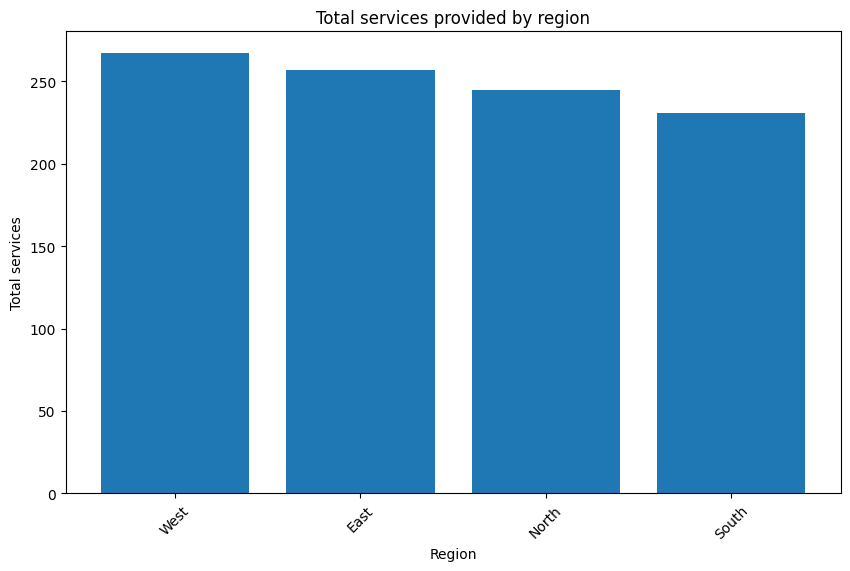

In [49]:
plt.figure(figsize=(10,6))
plt.bar(total_services_per_region.index,total_services_per_region.values)
plt.title('Total services provided by region')
plt.xlabel('Region')
plt.ylabel('Total services')
plt.xticks(rotation=45)
plt.savefig('total_services_per_region.png')
plt.show()


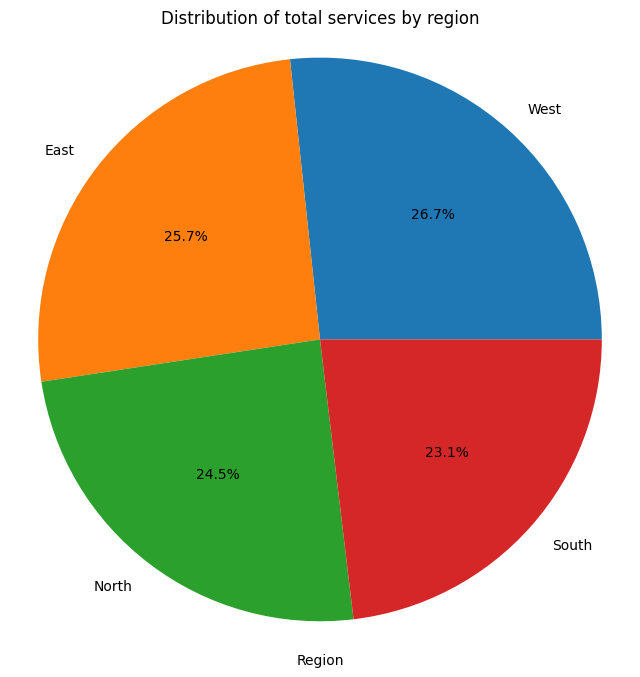

In [50]:
#Pie chart for total services by region
plt.figure(figsize=(8,8))
plt.pie(total_services_per_region, labels=total_services_per_region.index, autopct='%1.1f%%')
plt.title('Distribution of total services by region')
plt.axis('equal')
plt.xlabel('Region')
plt.savefig('total_services_Distribution_by_region.png')
plt.show()

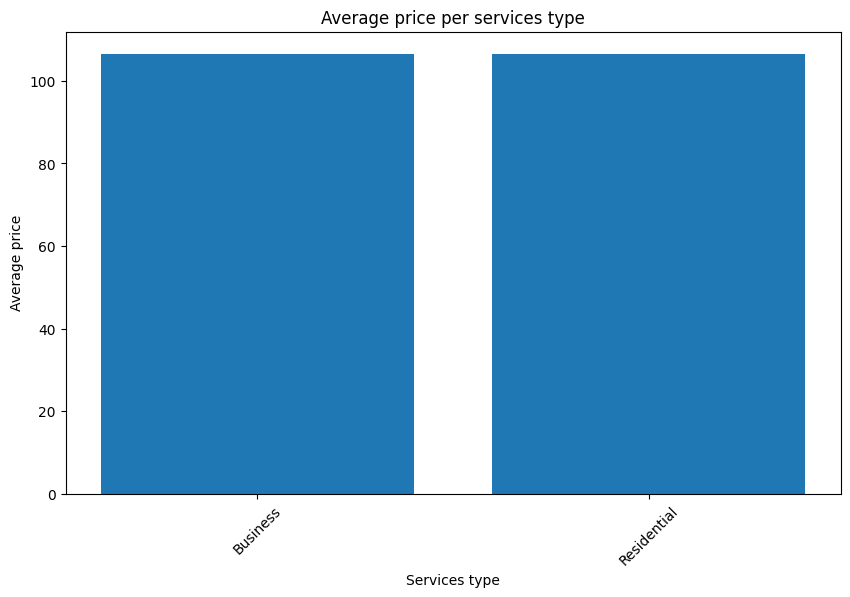

In [51]:
#Bar plot of average price per service type
plt.figure(figsize=(10,6))
plt.bar(average_prince_per_sevice.index,average_prince_per_sevice.values)
plt.title('Average price per services type')
plt.xlabel('Services type')
plt.ylabel('Average price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png')
plt.show()

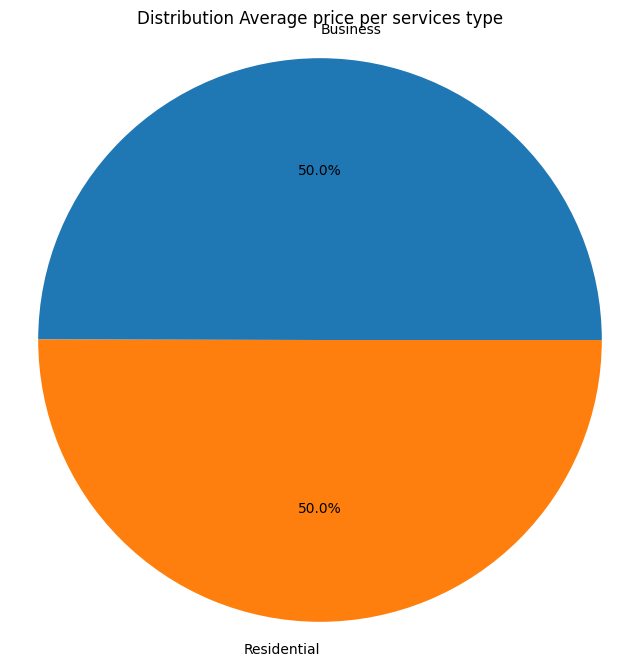

In [52]:
#Pie chart for  average price per service type
plt.figure(figsize=(8,8))
plt.pie(average_prince_per_sevice, labels=average_prince_per_sevice.index, autopct='%1.1f%%')
plt.title('Distribution Average price per services type')
plt.axis('equal')
plt.savefig('average_price_per_pie_service.png')
plt.show()

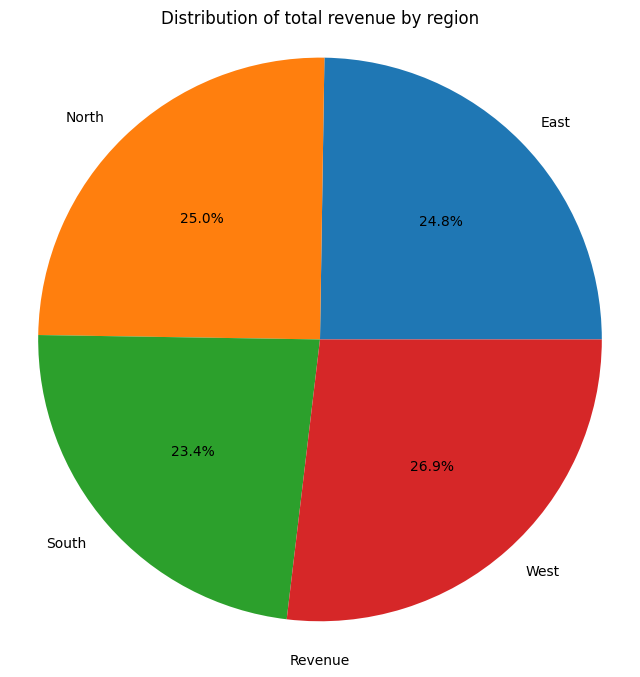

In [53]:
#Pie chart for revenue by services
plt.figure(figsize=(8,8))
plt.pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%')
plt.title('Distribution of total revenue by region')
plt.axis('equal')
plt.xlabel('Revenue')
plt.savefig('total_revenue_Distribution_by_region.png')
plt.show()

## Save output in file

In [54]:
#Save output to a text file
with open('analysis_output.txt','w')as f:
  f.writelines(output)